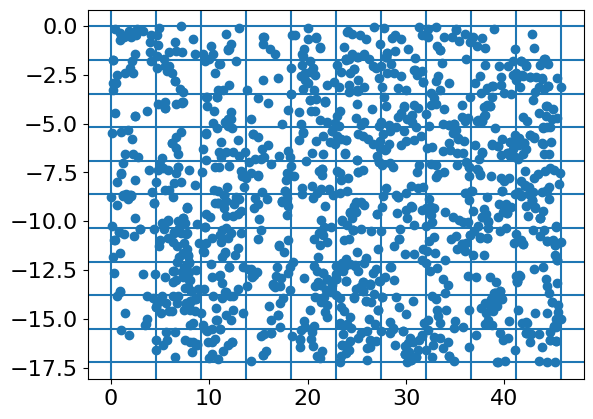

Started with  1238  points, counted  1238.0
average per bin is  12.38


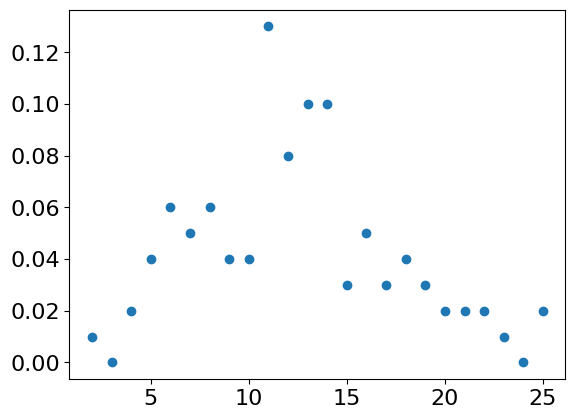

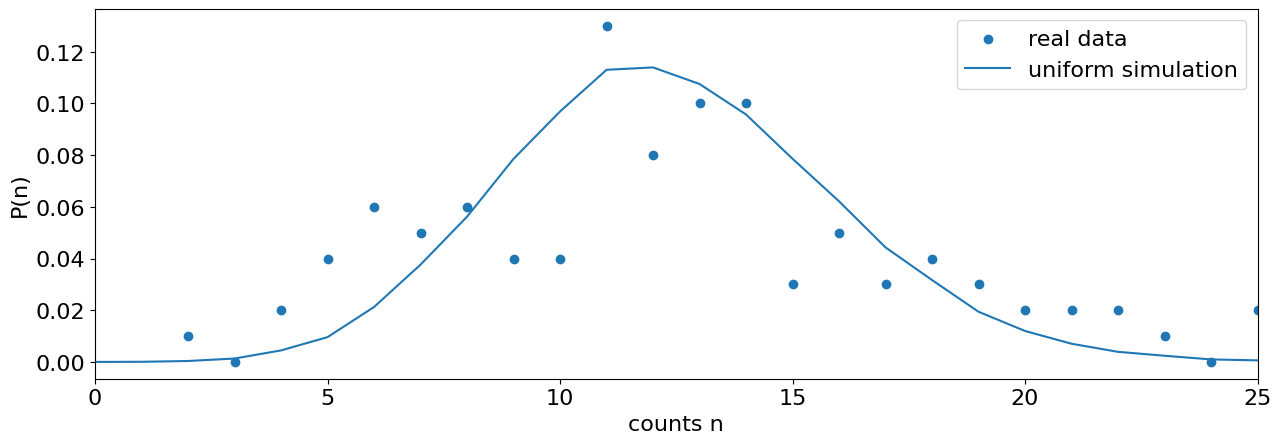

In [31]:
import numpy as np
import matplotlib.pyplot as plt

x=np.load("londonIncidents.npz")
x=x['all']

#Part A and B

#Setting the area of the plot
xmin=min(x[:,0])
xmax=max(x[:,0])
ymin=min(x[:,1])
ymax=max(x[:,1])

#Choosing number of bins
nx=10
ny=10

#defining the bounds and plot with lines and grids
xdiv=(xmax-xmin)/nx
ydiv=(ymax-ymin)/ny
plt.scatter(x[:,0],x[:,1])
for i in range(ny+1):
  plt.axvline(xmin+i*xdiv)
for i in range(ny+1):
  plt.axhline(ymin+i*ydiv)
plt.show()

#Part C
counts=np.zeros((nx,ny))
for point in x:
  counts[int(point[0]/xdiv),int(point[1]/ydiv)]+=1
frequency=counts/(nx*ny)
print("Started with ",len(x)," points, counted ", np.sum(counts))
print ("average per bin is ",sum(sum(frequency)))

#Part D
cmin=int(counts.min())
cmax=int(counts.max())
distribution=np.zeros(cmax-cmin+1)
for i in range (nx):
  for j in range (ny):
    distribution[int(counts[i,j])-cmin]+=1
distribution/=nx*ny
xvalues=np.array([i+cmin for i in range(cmax-cmin+1)])
plt.scatter(xvalues,distribution)
plt.show()

#Part E

nsim=1000
dmin=0
dmax=100
simDist=np.zeros(dmax-dmin+1)

for sim in range(nsim):
  simCounts=np.zeros((nx,ny))
  for p in range(len(x)):
    xval=np.random.random()*(xmax-xmin)+xmin
    yval=np.random.random()*(ymax-ymin)+ymin
    simCounts[int(xval/xdiv),int(yval/ydiv)]+=1
  for i in range(nx):
    for j in range(ny):
      simDist[int(simCounts[i,j])]+=1
simDist=simDist/sum(simDist)


plt.rcParams['font.size']='16'
plt.figure().set_figwidth(15)
plt.scatter(xvalues,distribution, label="real data")
xvalues=np.array([i+dmin for i in range(len(simDist))])
plt.plot(xvalues,simDist,label="uniform simulation")
plt.xlim(0, 25)
plt.legend(loc='upper right')
plt.xlabel("counts n")
plt.ylabel("P(n)")
plt.show()
plt.rcParams['font.size'] = '10'